## Mall Costumers Clustering

### Import Required Libraries

In [174]:
## Data manipulation and analysis
import pandas as pd
import numpy as np

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


### Load and Explore Dataset

In [149]:
db = pd.read_csv("Mall_Customers.csv")

print(" -------- Head -------- ")
print(db.head())

 -------- Head -------- 
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [150]:
print(" -------- Info -------- ")
print(db.info())

 -------- Info -------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [151]:
print(" -------- Describe -------- ")
print(db.describe()) ## Statistics for int columns

 -------- Describe -------- 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [152]:
print(" -------- Null values Column -------- ")
print(db.isnull().sum())

 -------- Null values Column -------- 
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [153]:
print(" -------- Unique Values Column -------- ")
print(db.nunique())

 -------- Unique Values Column -------- 
CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [154]:
print(" -------- Duplicate Rows -------- ")
print(db.duplicated().sum())

 -------- Duplicate Rows -------- 
0


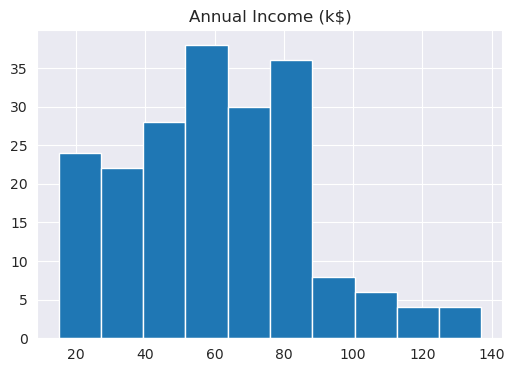

In [155]:
plt.figure(figsize=(6,4))
db['Annual Income (k$)'].hist(bins=10)
plt.title('Annual Income (k$)')
plt.show()

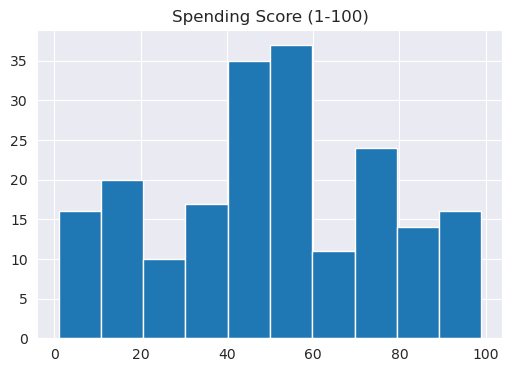

In [156]:
plt.figure(figsize=(6,4))
db['Spending Score (1-100)'].hist(bins=10)
plt.title('Spending Score (1-100)')
plt.show()

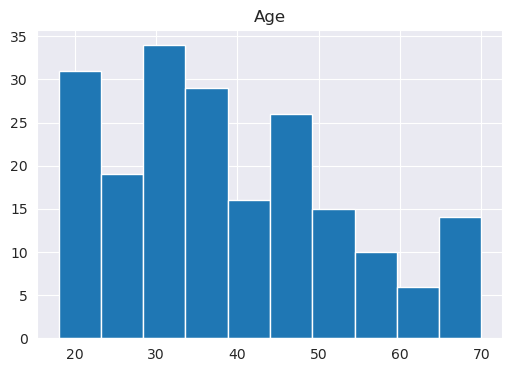

In [157]:
plt.figure(figsize=(6,4))
db['Age'].hist(bins=10)
plt.title('Age')
plt.show()

<AxesSubplot: xlabel='Genre', ylabel='count'>

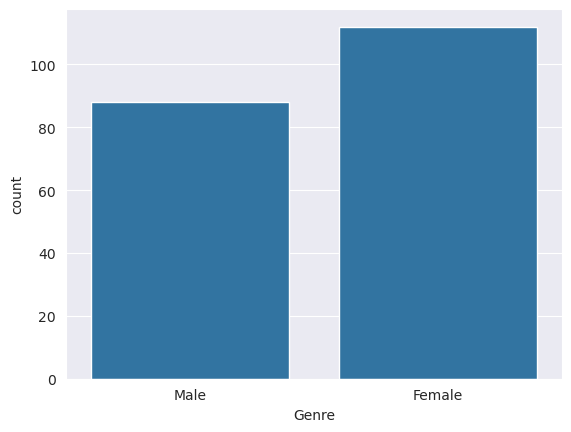

In [158]:
sns.countplot(x='Genre', data=db)

### Data Preprocessing

In [159]:
## Drop CostumerID
db_pre = db.drop('CustomerID',axis=1)
print(db_pre.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [160]:
## Encode Categorical Values
label_encoder = LabelEncoder()
db_pre['Genre'] = label_encoder.fit_transform(db_pre['Genre']) ## 0 - F 1 - M
print(db_pre.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      1   19                  15                      39
1      1   21                  15                      81
2      0   20                  16                       6
3      0   23                  16                      77
4      0   31                  17                      40


### Exploratory Data Analysis (EDA)

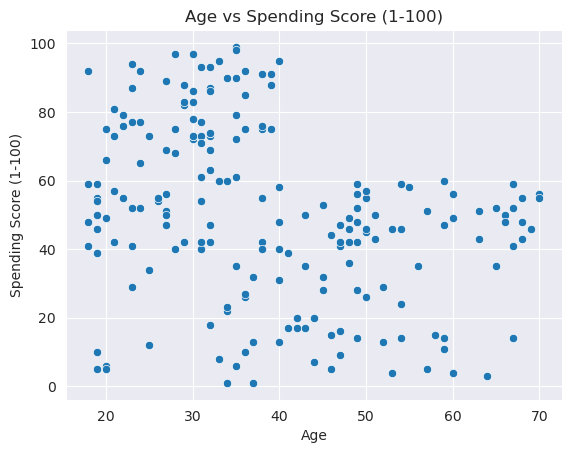

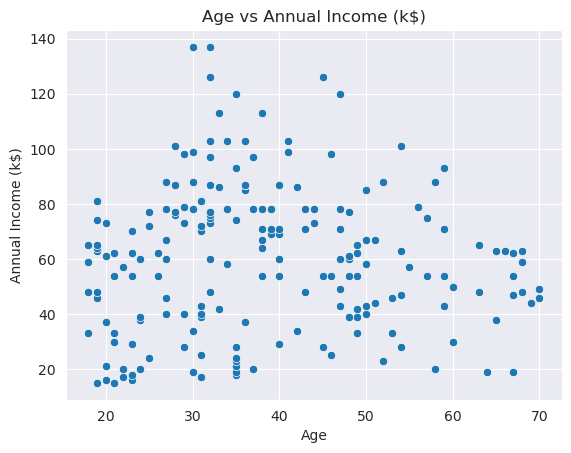

In [161]:
sns.scatterplot(data=db_pre, x='Age', y='Spending Score (1-100)')
plt.title('Age vs Spending Score (1-100)')
plt.show()

sns.scatterplot(data=db_pre, x='Age', y='Annual Income (k$)')
plt.title('Age vs Annual Income (k$)')
plt.show()

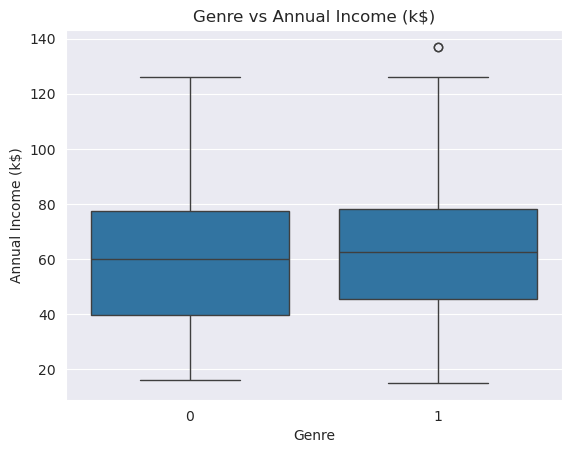

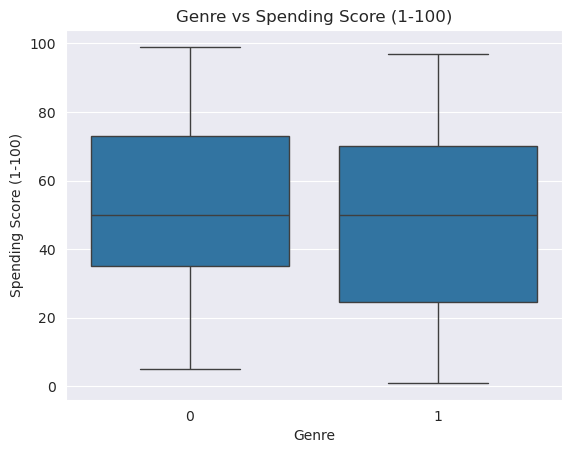

In [162]:
sns.boxplot(x='Genre', y='Annual Income (k$)', data=db_pre)
plt.title('Genre vs Annual Income (k$)')
plt.show()
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=db_pre)
plt.title('Genre vs Spending Score (1-100)')
plt.show()


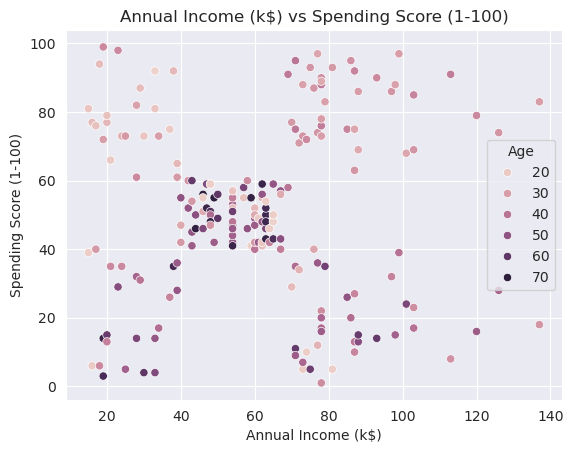

In [163]:
sns.scatterplot(data=db_pre, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Age')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

### Data Preparation For Clusterin

In [164]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
db_pre[numeric_cols] = scaler.fit_transform(db_pre[numeric_cols])

print(db_pre.head())

   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0      1 -1.424569           -1.738999               -0.434801
1      1 -1.281035           -1.738999                1.195704
2      0 -1.352802           -1.700830               -1.715913
3      0 -1.137502           -1.700830                1.040418
4      0 -0.563369           -1.662660               -0.395980


### Clustering

In [165]:
kmeans = KMeans(n_clusters=5, random_state=42)


kmeans_labels = kmeans.fit_predict(db_pre)

print("K-Means cluster labels:", kmeans_labels)

K-Means cluster labels: [2 4 2 4 2 4 2 4 0 4 0 4 0 4 2 4 2 4 0 4 2 4 0 4 0 4 0 4 2 4 0 4 0 4 0 4 0
 4 2 4 0 4 0 2 0 4 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [166]:
agglo = AgglomerativeClustering(n_clusters=5)

agglo_labels = agglo.fit_predict(db_pre)

print("Hierarchical cluster labels:", agglo_labels)

Hierarchical cluster labels: [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 1 0 1 0 4 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 1 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 1 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [167]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict cluster labels
dbscan_labels = dbscan.fit_predict(db_pre)

print("DBSCAN cluster labels:", dbscan_labels)

DBSCAN cluster labels: [-1 -1 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  1 -1  1 -1 -1 -1  1 -1  1
 -1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  2  3
  3  3  2 -1  3  4  2  4  2  4  3  4  4 -1 -1  2  4 -1  2 -1 -1  3  4  2
 -1  2  4  5  2 -1  3  2  4 -1  4  2  3  4  2  3 -1  2 -1  5  4 -1  3  5
  2  3  4  5  3  2  6  5  4  3 -1  4  6  6  6  3 -1  5  3  3 -1  2  2  2
  5 -1 -1  8 -1  7 -1  8 -1 -1 -1 -1  3  7 -1  7 -1 -1 -1  7 -1  8 -1  7
 -1 -1 -1  7 -1  8 -1  8 -1  7 -1  7 -1  7 -1  7 -1  7 -1  7 -1  7 -1  7
 -1 -1 -1 -1 -1  8 -1  7 -1 -1 -1 -1 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


### Visualization

In [170]:
db_kmeans = db.copy()

db_kmeans['cluster'] = kmeans_labels

print(db_kmeans.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        2  
1        4  
2        2  
3        4  
4        2  


In [171]:
db_agglo = db.copy()

db_agglo['cluster'] = agglo_labels

print(db_agglo.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        4  
1        0  
2        4  
3        0  
4        4  


In [172]:
db_dbscan = db.copy()

db_dbscan['cluster'] = dbscan_labels

print(db_dbscan.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0       -1  
1       -1  
2       -1  
3        0  
4       -1  


In [175]:
def plot_clusters(dataframe, scaled_data, title):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(scaled_data)

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dataframe['cluster'], cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

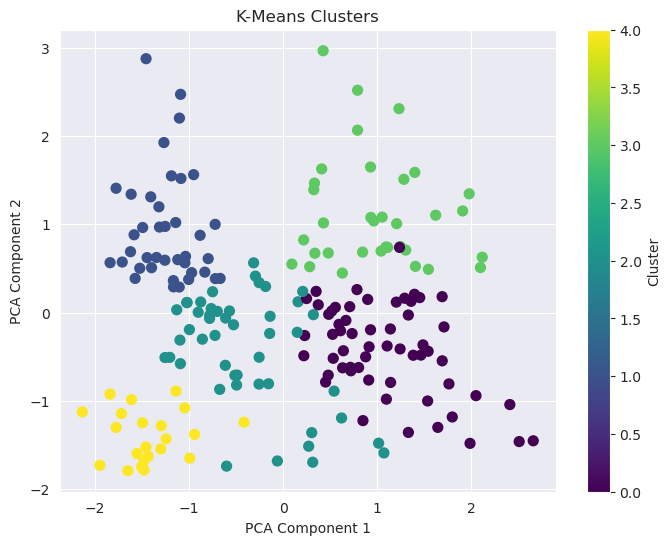

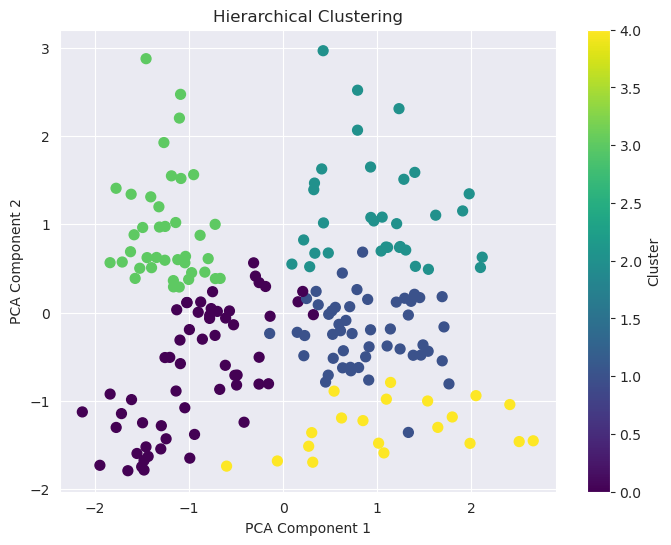

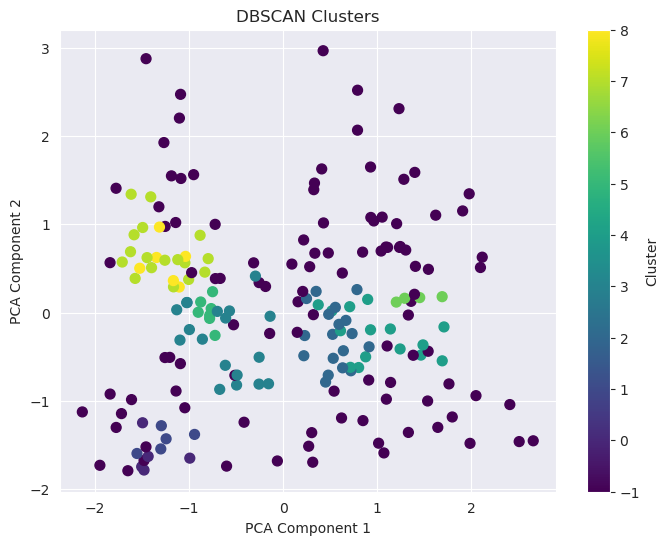

In [176]:
plot_clusters(db_kmeans, db_pre, 'K-Means Clusters')
plot_clusters(db_agglo, db_pre, 'Hierarchical Clustering')
plot_clusters(db_dbscan, db_pre, 'DBSCAN Clusters')
